In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

In [224]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA

In [8]:
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## 데이터 전처리

In [293]:
raw_data = pd.read_excel('./Press_RawDataSet.xlsx')

In [294]:
raw_data = raw_data.drop(columns=['idx','Machine_Name','Item No'],axis=1)

In [295]:
time = []
for i in raw_data['working time']:
    j = str(i).replace(' 00:00:00','')
    time.append(j)

In [296]:
raw_data['working time'] = time

In [297]:
new_data = raw_data.loc[raw_data["working time"].between('2020-05-04', '2020-05-29')]

In [300]:
new_data

,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,2020-05-04,550.0,275.0,274.0,549.0
1,2020-05-04,550.0,275.0,274.0,549.0
2,2020-05-04,550.0,275.0,275.0,550.0
3,2020-05-04,550.0,275.0,275.0,550.0
4,2020-05-04,549.2,274.6,276.0,550.6
...,...,...,...,...,...
64354,2020-05-29,550.0,275.0,267.0,542.0
64355,2020-05-29,549.8,274.9,269.0,543.9
64356,2020-05-29,549.8,274.9,269.0,543.9
64357,2020-05-29,550.6,275.3,267.0,542.3


In [299]:
x_data = new_data.drop(['working time','Press time(ms)','Pressure 5'],axis=1)

In [301]:
scaler = preprocessing.StandardScaler()
x_data.iloc[:,[0,1]] = scaler.fit_transform(x_data.iloc[:,[0,1]])
x_data.values

array([[-0.0650941 ,  1.4034494 ],
       [-0.0650941 ,  1.4034494 ],
       [-0.0650941 ,  1.74076585],
       ...,
       [-0.1607243 , -0.28313286],
       [ 0.22179651, -0.95776577],
       [ 0.22179651, -0.95776577]])

In [302]:
x_data

,Pressure 1,Pressure 2
0,-0.065094,1.403449
1,-0.065094,1.403449
2,-0.065094,1.740766
3,-0.065094,1.740766
4,-0.447615,2.078082
...,...,...
64354,-0.065094,-0.957766
64355,-0.160724,-0.283133
64356,-0.160724,-0.283133
64357,0.221797,-0.957766


## 모델링
- DBSCAN : 밀도 기반 클러스터링

In [334]:
dbscan = DBSCAN(eps=0.5, min_samples = 300)

In [335]:
dbscan.fit(x_data)

DBSCAN(min_samples=300)

In [336]:
cores = dbscan.core_sample_indices_

In [337]:
cores

array([    0,     1,     2, ..., 62722, 62723, 62724], dtype=int64)

In [338]:
y_pred = dbscan.labels_

In [339]:
y_pred

array([0, 0, 0, ..., 1, 3, 3], dtype=int64)

In [340]:
x_data['cluster_label'] = y_pred

In [341]:
x_data['cluster_label'].value_counts()

 3    23098
 0    19846
 1    19159
 2      440
-1      182
Name: cluster_label, dtype: int64

In [357]:
values = result['cluster_label'].value_counts()

In [358]:
values

3    23098
0    19846
1    19159
2      440
Name: cluster_label, dtype: int64

In [361]:
cluster = list(values)

In [362]:
label = ['cluster3','cluster2','cluster0','cluster1']

In [363]:
label

['cluster3', 'cluster2', 'cluster0', 'cluster1']

#### outlier 집단 제거

In [354]:
result = x_data.iloc[y_pred!=-1,:]

In [355]:
result

,Pressure 1,Pressure 2,cluster_label
0,-0.065094,1.403449,0
1,-0.065094,1.403449,0
2,-0.065094,1.740766,0
3,-0.065094,1.740766,0
4,-0.447615,2.078082,0
...,...,...,...
64354,-0.065094,-0.957766,3
64355,-0.160724,-0.283133,1
64356,-0.160724,-0.283133,1
64357,0.221797,-0.957766,3


In [359]:
list(values)

[23098, 19846, 19159, 440]

## 클러스터링 결과 확인

C:\Users\juhee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


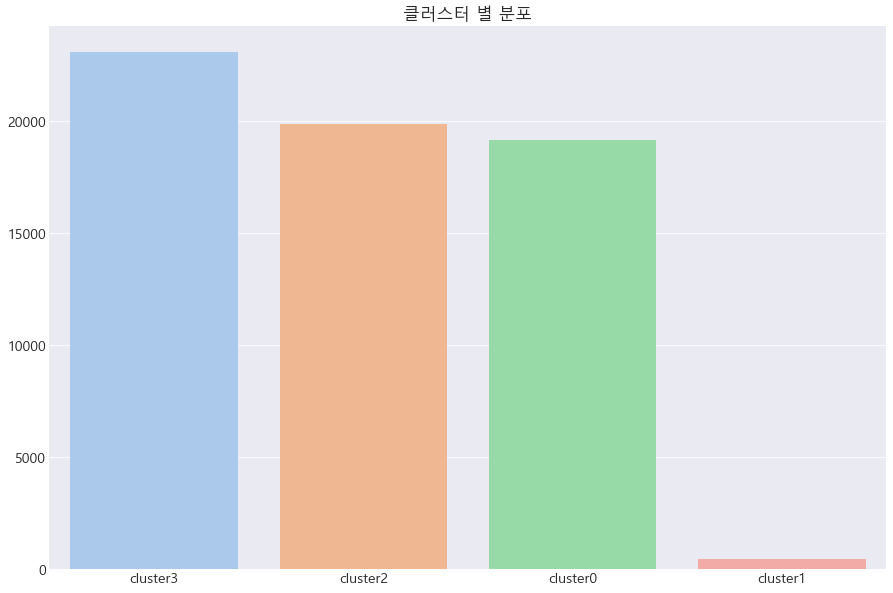

In [364]:
x = label
y = cluster
plt.rc('font',size=14)
plt.figure(figsize=(15,10))
sns.barplot(x,y, palette='pastel')
plt.title('클러스터 별 분포')
plt.show()

In [229]:
from sklearn import preprocessing

<AxesSubplot:xlabel='cluster_label'>

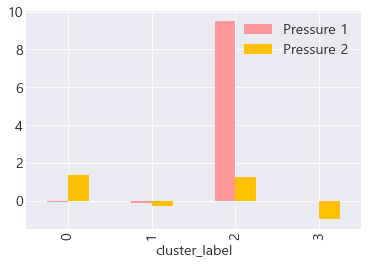

In [365]:
data_mean = result.groupby('cluster_label').mean().plot.bar(color = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'])
data_mean

In [208]:
cluster = list(values)

In [228]:
cluster

[22976, 19064, 12676, 2366]

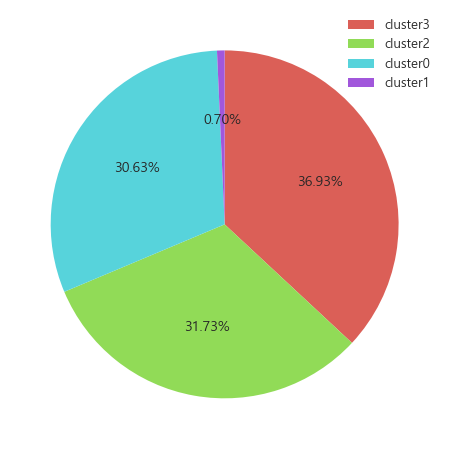

In [366]:
colors = sns.color_palette('hls',len(label)) 
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(cluster, 
       startangle=90, 
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.rc('font', size=13)
plt.legend(pie[0],label) 
plt.show()